In [1]:
!nvidia-smi

Tue Jul  9 13:41:54 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git


In [4]:
from ultralytics import YOLOv10


In [5]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt


In [6]:
!pip install -q supervision

In [12]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jSZWz3hn1N2862RqWA42")
project = rf.workspace("child-detection-v2").project("child-detection-m8l4l")
version = project.version(2)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to child-detection-2 in yolov9:: 100%|██████████| 14706/14706 [00:02<00:00, 6810.60it/s]


In [9]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

In [13]:
import yaml
import os

# Define the data to be written to the YAML file
data = {
    "names": ["Kids", "tedy bear"],
    "nc": 2,
    "roboflow": {
        "license": "CC BY 4.0",
        "project": "child-detection-m8l4l",
        "url": "https://universe.roboflow.com/child-detection-v2/child-detection-m8l4l/dataset/2",
        "version": 2,
        "workspace": "child-detection-v2"
    },
    "test": "../test/images",
    "train": "../child-detection-2/train/images",
    "val": "../child-detection-2/valid/images"
}

# Get the current directory
current_directory = os.getcwd()

# Define the file path
file_path = os.path.join(current_directory, "data2.yaml")

# Write the data to the YAML file
with open(file_path, "w") as file:
    yaml.dump(data, file)

print(f"YAML file saved to {file_path}")


YAML file saved to /kaggle/working/data2.yaml


In [10]:
import os

# Set WANDB_MODE environment variable to "disabled"
os.environ["WANDB_MODE"] = "disabled"

In [22]:
 %cd {HOME}

!yolo task=detect mode=train epochs=50 imgsz=640 batch=16 plots=True \
model=/kaggle/working/weights/yolov10n.pt optimizer=SGD momentum=0.9\
data=/kaggle/working/data2.yaml

/kaggle/working
New https://pypi.org/project/ultralytics/8.2.51 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/weights/yolov10n.pt, data=/kaggle/working/data2.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, re

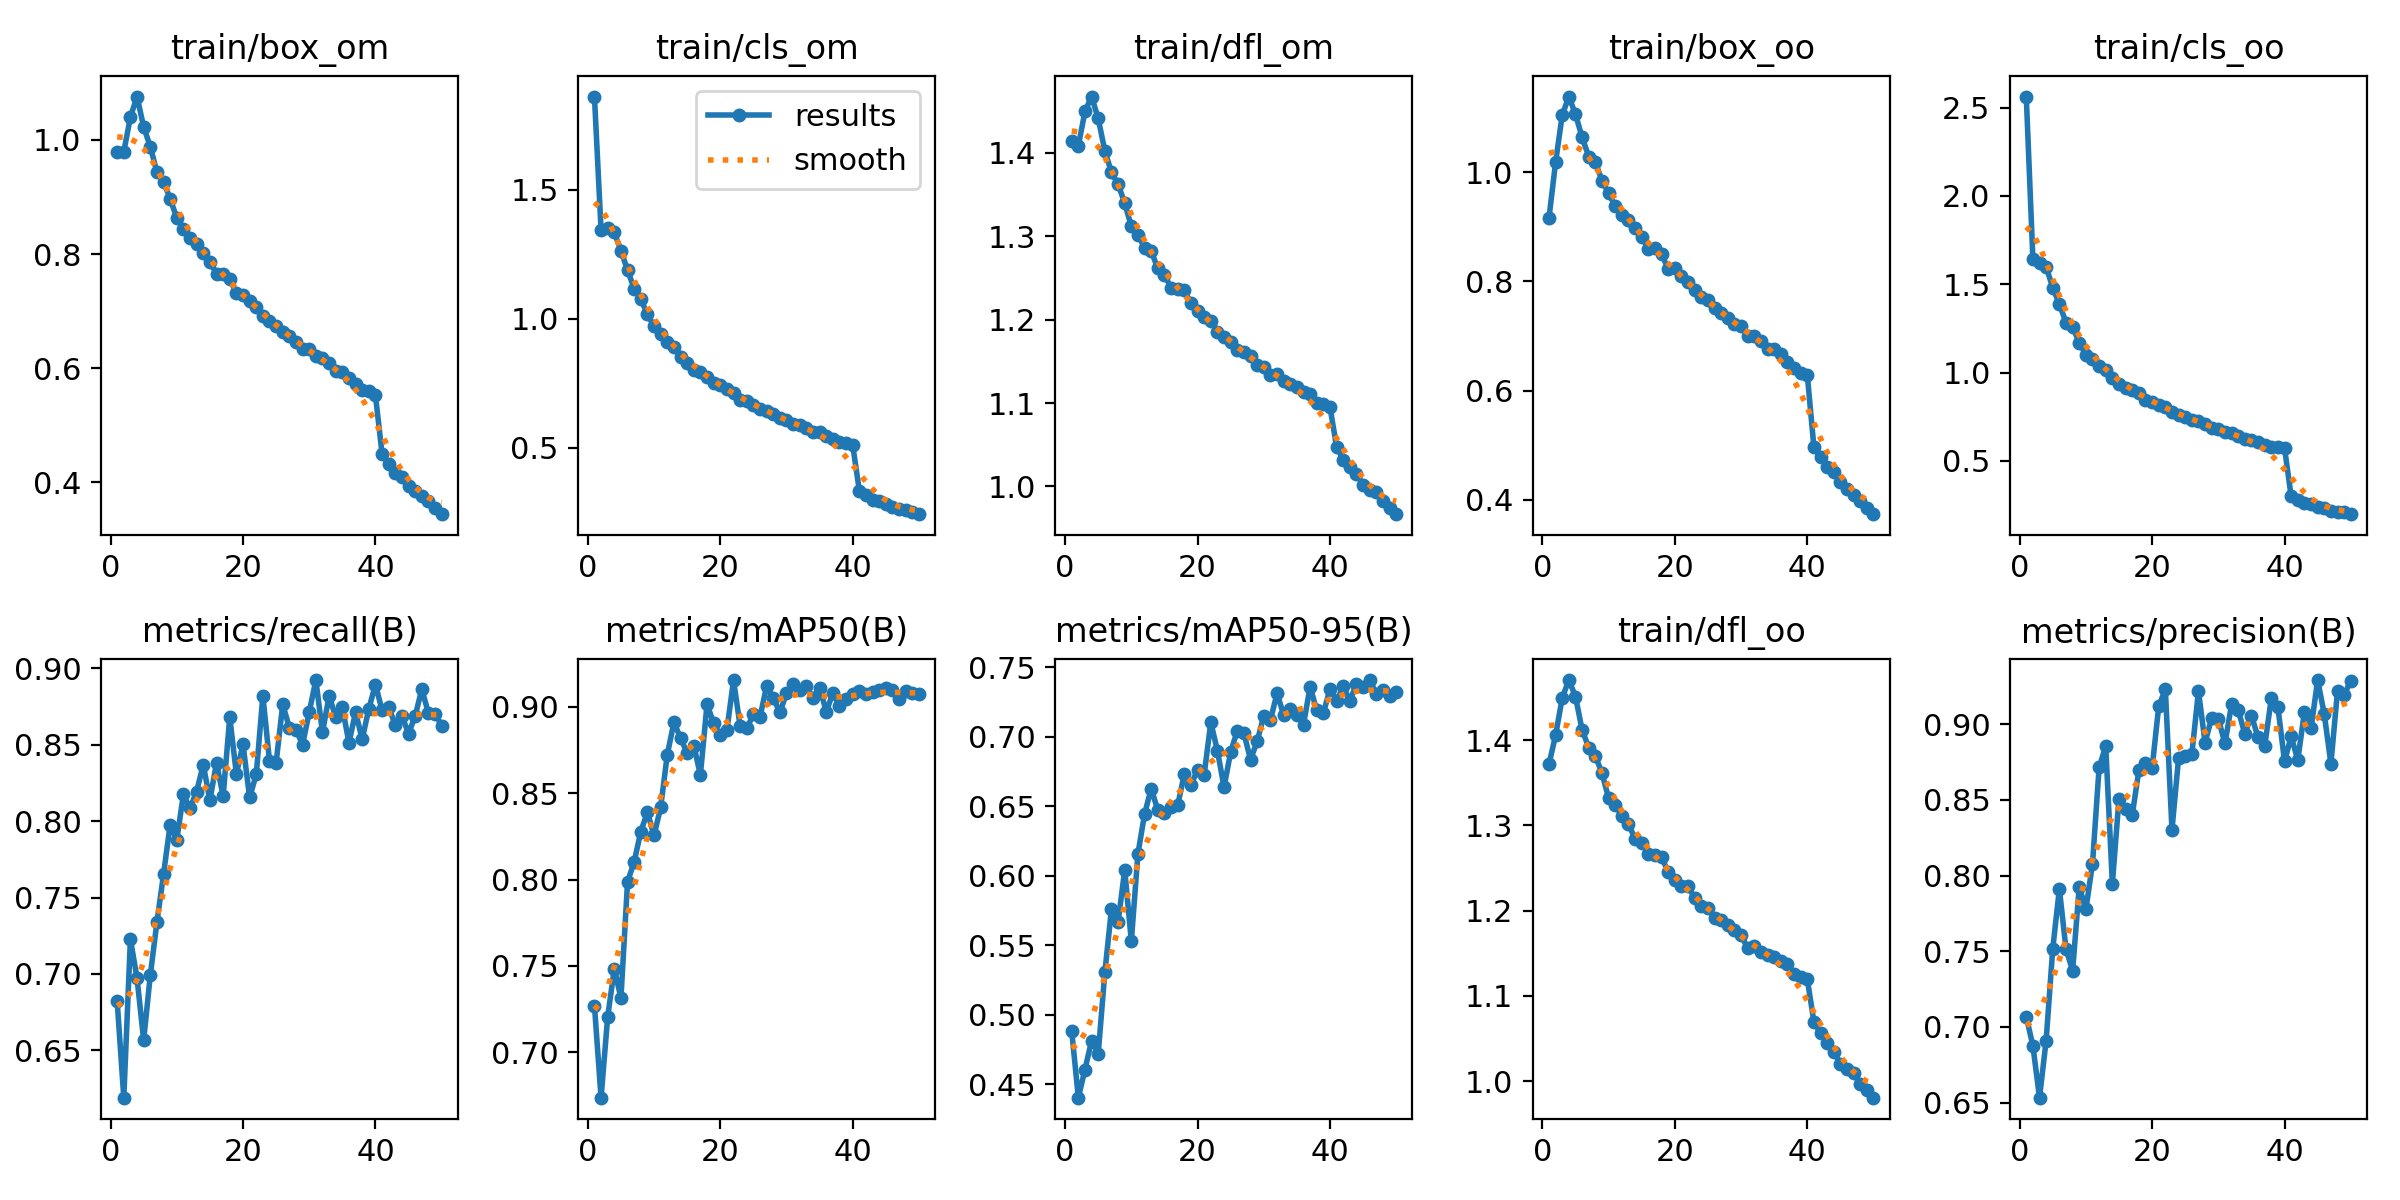

In [24]:
from IPython.display import Image
Image(filename=f'/kaggle/working/runs/detect/train5/results.png', width=900)

In [27]:
!yolo task=detect mode=val model=/kaggle/working/runs/detect/train5/weights/best.pt data=/kaggle/working/data2.yaml


Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 285 layers, 2695196 parameters, 0 gradients, 8.2 GFLOPs
val: Scanning /kaggle/working/child-detection-2/valid/labels.cache... 263 images
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        263        350      0.908      0.869       0.91      0.741
                  Kids        263        263      0.831      0.749      0.826      0.522
             tedy bear        263         87      0.984      0.989      0.994       0.96
Speed: 1.1ms preprocess, 5.4ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


In [31]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train5/weights/best.pt conf=0.5 source=/kaggle/working/child-detection-3/test/images


Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 285 layers, 2695196 parameters, 0 gradients, 8.2 GFLOPs

image 1/146 /kaggle/working/child-detection-3/test/images/027ad4e7b76e7a3cad0017a746000d90_jpg.rf.a4ceafc794af51c13de4b8b690063ab7.jpg: 640x640 1 tedy bear, 10.7ms
image 2/146 /kaggle/working/child-detection-3/test/images/1000_F_496639201_iow3Qg7eH0wA59EsfTzU7i6u7ZB8rGKD_jpg.rf.13d805e839fd9c73617a1492d263f12b.jpg: 640x640 1 tedy bear, 10.2ms
image 3/146 /kaggle/working/child-detection-3/test/images/27F324EC00000578-3054216-Car_seats_slings_swings_and_bouncers_raise_the_risk_of_death_via-a-97_1429891612319_jpg.rf.6558ff153ad552a74e0950cf382d84f2.jpg: 640x640 1 Kids, 10.0ms
image 4/146 /kaggle/working/child-detection-3/test/images/31_jpg.rf.91c4628a839f25e744eb16333ebd18a9.jpg: 640x640 1 Kids, 9.5ms
image 5/146 /kaggle/working/child-detection-3/test/images/379937506_jpg.rf.da917751342f85b14a2b47a773be0dbf.jpg: 640x640 1 Kids,

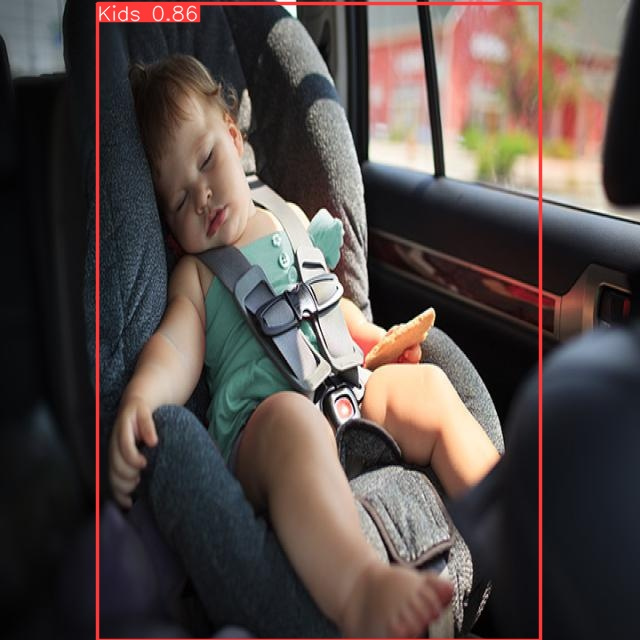

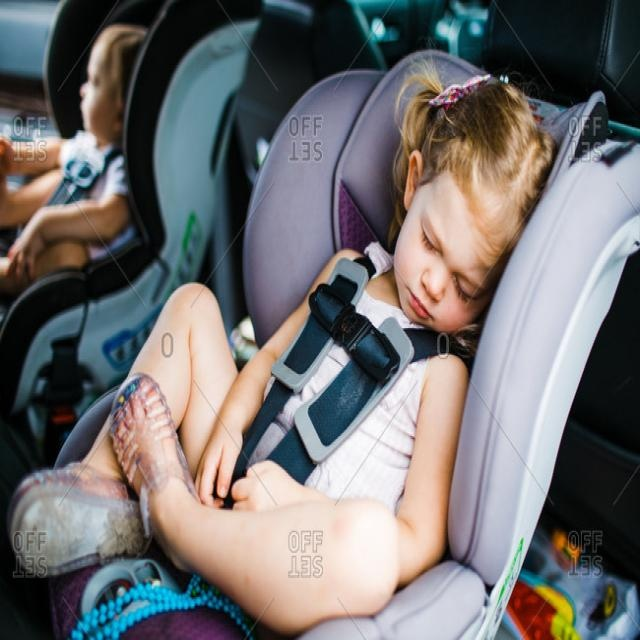

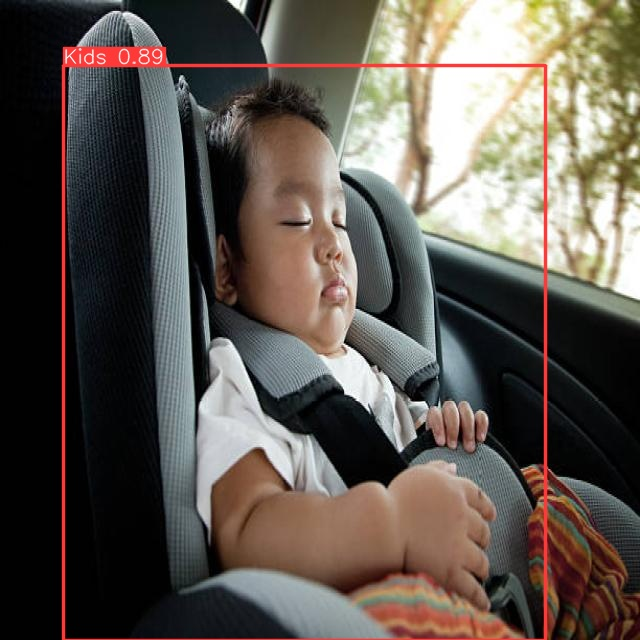

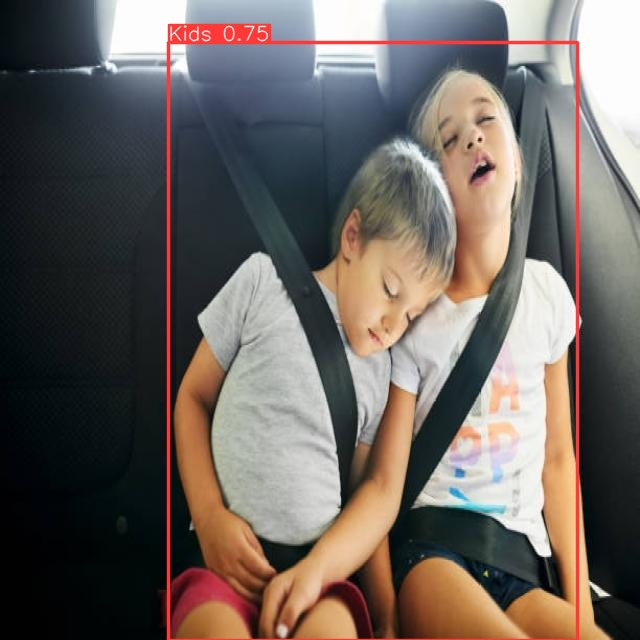

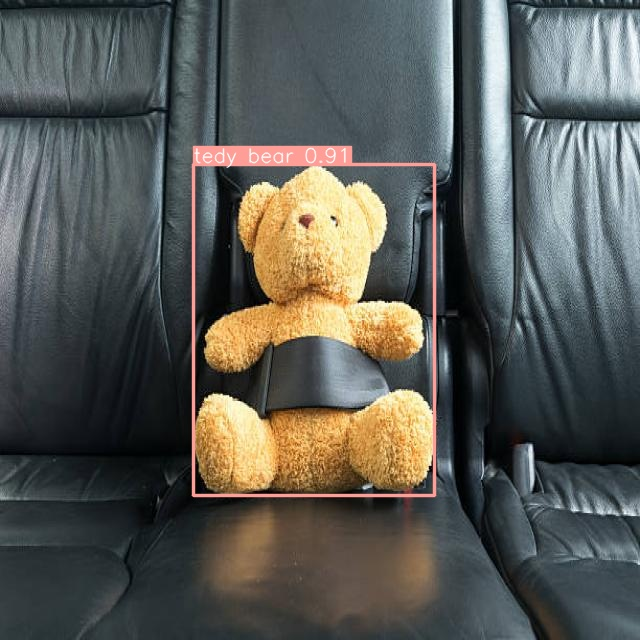

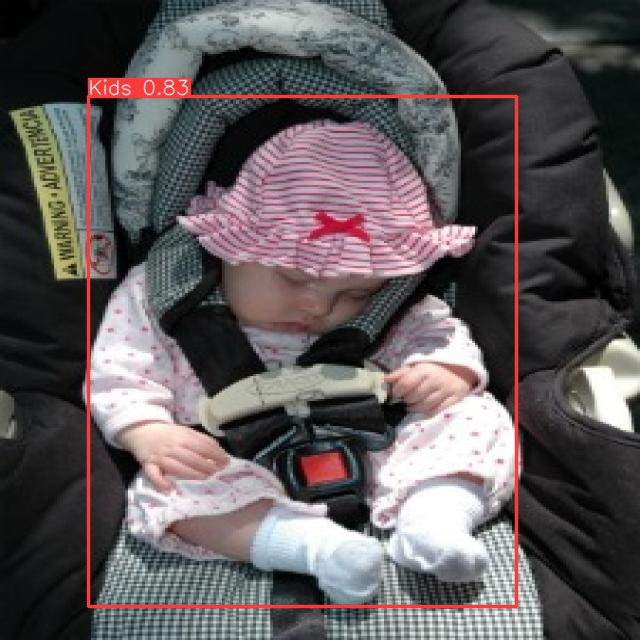

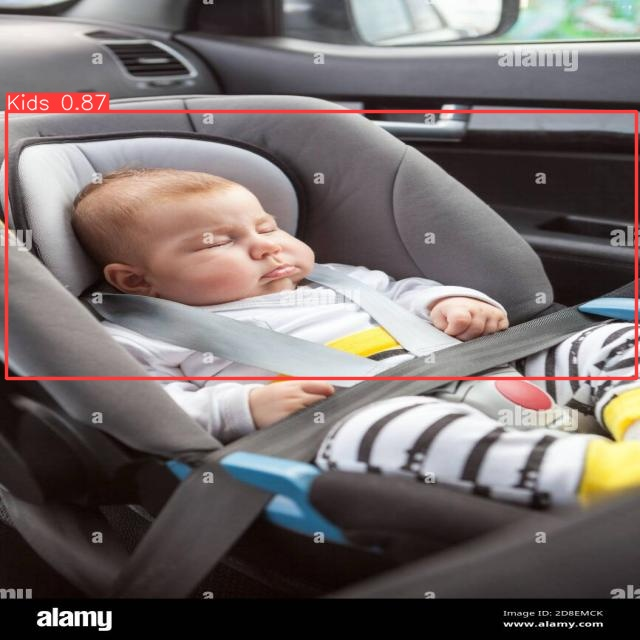

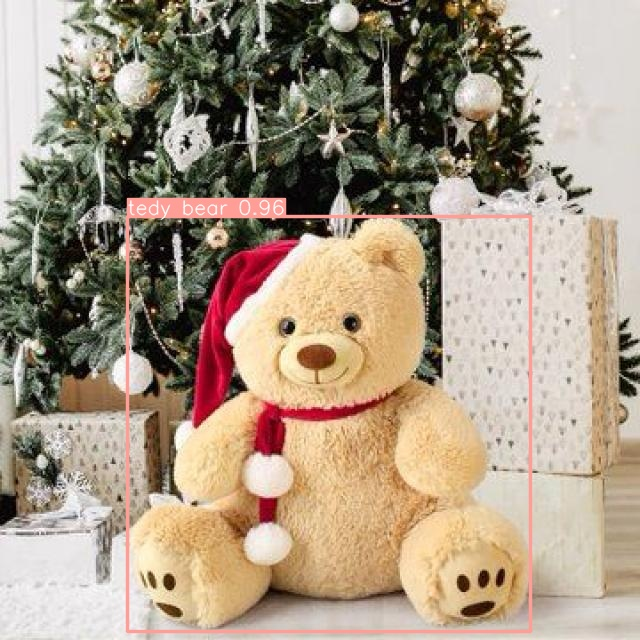

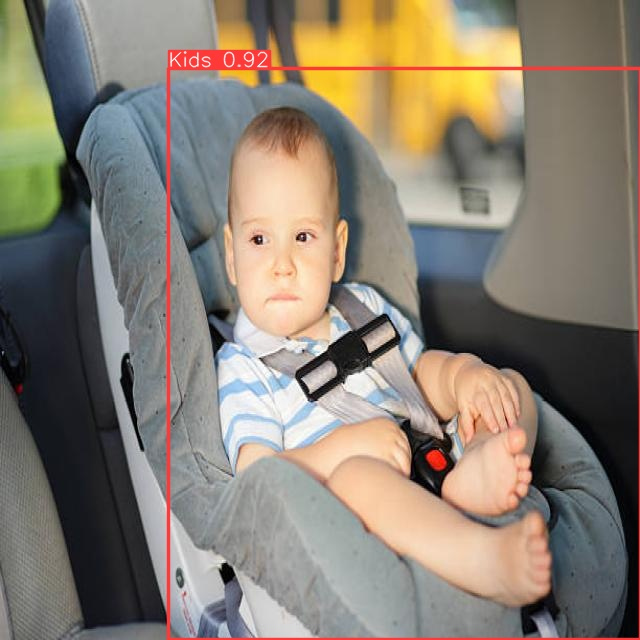

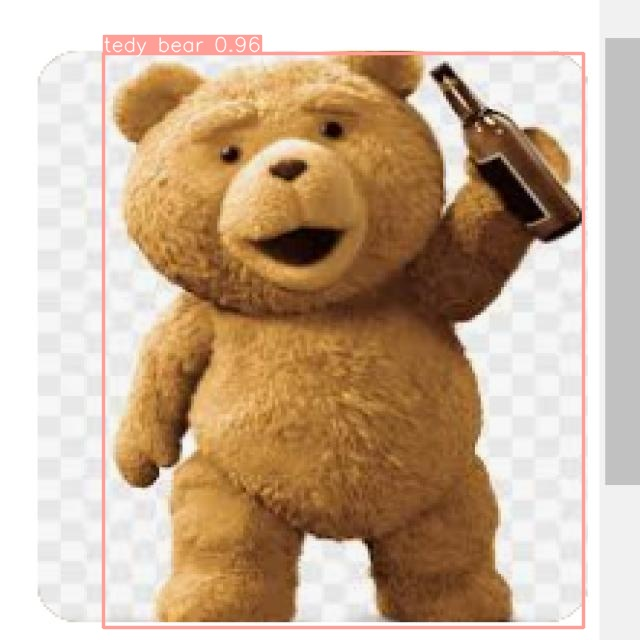

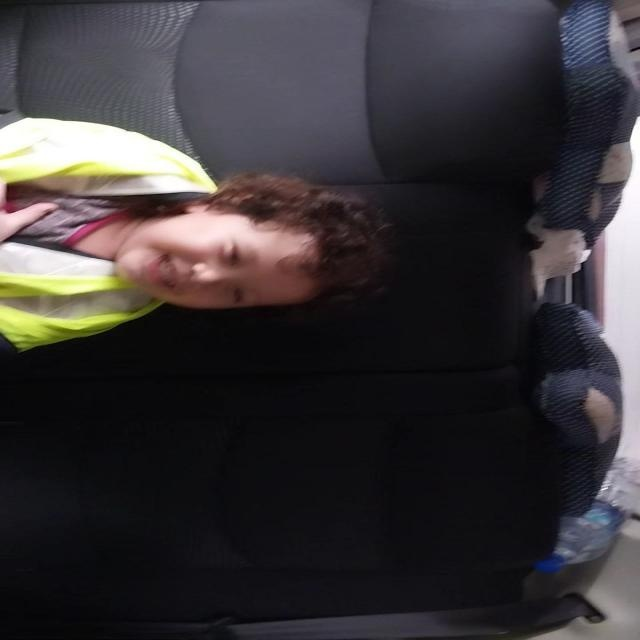

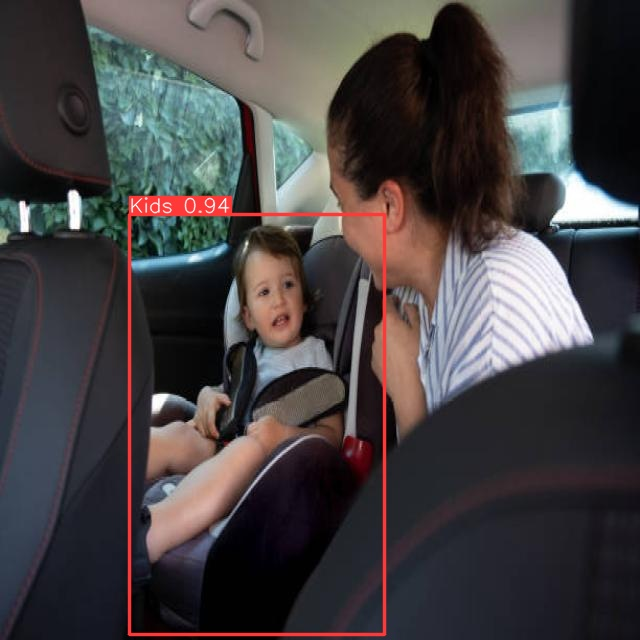

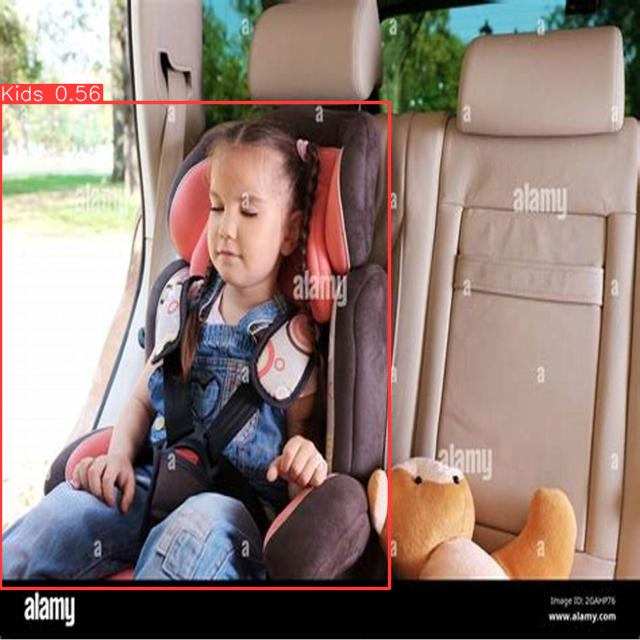

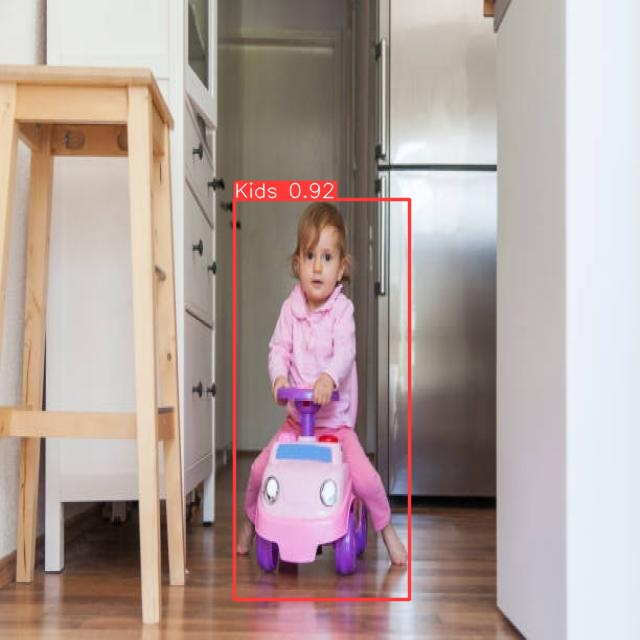

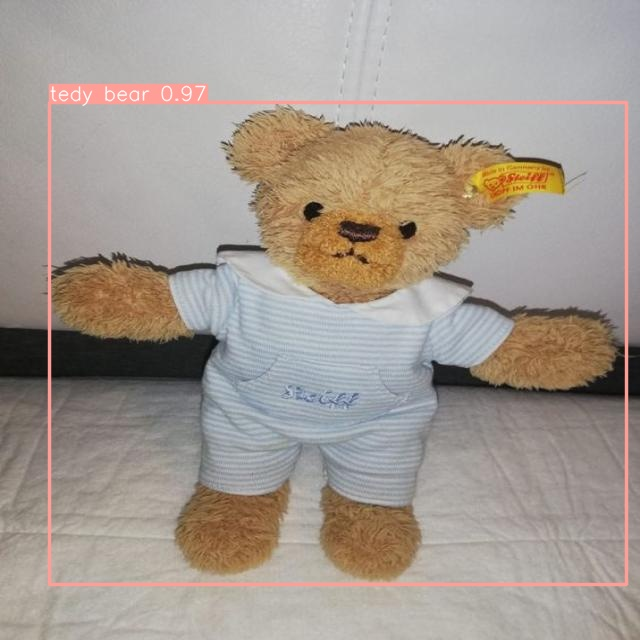

In [32]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict2/*.jpg')[10:25]:
      display(Image(filename=image_path,width=400))
      print("\n")